<a href="https://colab.research.google.com/github/magaramol/nits_task/blob/main/Final_nits_solutions_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from scipy.stats import f_oneway
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import SVC
from IPython import get_ipython
from IPython.display import display

# Exploratory data analysis (EDA)

In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/A_Quick_colab/nits.csv')
df=df1.copy()

In [ ]:
df.head(5)

,target,feature1,feature2,feature3,feature4
0,3.0,98.693792,282.271563,66.843083,19.0
1,5.0,667.546946,229.514699,-232.033562,18.0
2,5.0,14.562982,259.189071,101.628816,19.0
3,0.0,-38.394727,265.754566,120.453983,11.0
4,1.0,274.565713,372.799317,25.642173,14.0


In [ ]:
df.describe()

,target,feature1,feature2,feature3,feature4
count,61038.000000,61045.000000,61045.000000,60913.000000,61029.000000
mean,2.609604,78.057774,334.551637,101.132898,14.508988
std,1.847231,407.568110,67.280329,200.604498,2.869471
min,0.000000,-1755.094888,68.202629,-684.850306,10.000000
25%,1.000000,-196.726297,289.442993,-34.209429,12.000000
50%,3.000000,78.905095,334.274883,101.022244,15.000000
75%,4.000000,353.230435,379.722822,235.942133,17.000000
max,5.000000,1737.373411,618.453382,1030.735499,19.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61045 entries, 0 to 61044
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   target    61038 non-null  float64
 1   feature1  61045 non-null  float64
 2   feature2  61045 non-null  float64
 3   feature3  60913 non-null  float64
 4   feature4  61029 non-null  float64
dtypes: float64(5)
memory usage: 2.3 MB


### **EDA Summary**

1. **Target Variable (Target)**:
   - Count: 61,038 observations (no missing values).
   - Mean: 2.61, with a standard deviation of 1.85, indicating a moderate spread.
   - Distribution:
     - Minimum: 0, Maximum: 5.
     - Median (50%): 3.
     - Most values lie between 1 and 4, as suggested by the interquartile range (1 to 4).

2. **Feature 1**:
   - Count: 61,045 observations (no missing values).
   - Mean: 78.06, with a very high standard deviation of 407.57, indicating significant variability in the data.
   - Distribution:
     - Minimum: -1755.09, Maximum: 1737.37.
     - Median: 78.91.
     - Notable presence of negative values and extreme outliers (far beyond the 25th and 75th percentiles).

3. **Feature 2**:
   - Count: 61,045 observations (no missing values).
   - Mean: 334.55, with a standard deviation of 67.28, suggesting moderate variability.
   - Distribution:
     - Minimum: 68.20, Maximum: 618.45.
     - Median: 334.27.
     - Most values are concentrated between 289.44 (25th percentile) and 379.72 (75th percentile).

4. **Feature 3**:
   - Count: 60,913 observations (132 missing values).
   - Mean: 101.13, with a standard deviation of 200.60, showing a wide spread.
   - Distribution:
     - Minimum: -684.85, Maximum: 1030.74.
     - Median: 101.02.
     - Presence of extreme outliers on both ends of the range.
     - Missing values might need imputation or further investigation.

5. **Feature 4**:
   - Count: 61,029 observations (9 missing values).
   - Mean: 14.51, with a standard deviation of 2.87, suggesting low variability.
   - Distribution:
     - Minimum: 10, Maximum: 19.
     - Median: 15.
     - Values appear relatively consistent, with a narrow interquartile range (12 to 17).


In [ ]:
# lets check null values & treat them

In [ ]:
df.isnull().sum()

,0
target,7
feature1,0
feature2,0
feature3,132
feature4,16


In [ ]:
# lets drop null values |

In [ ]:
temp_df=df.dropna()
print(len(temp_df)/len(df))

0.9974608895077401


In [ ]:
df=df.dropna()

After removing null values, we retained 99.74% of the data, ensuring minimal data loss for analysis.

### box plot

In [ ]:
# now lets check outlier using box plot

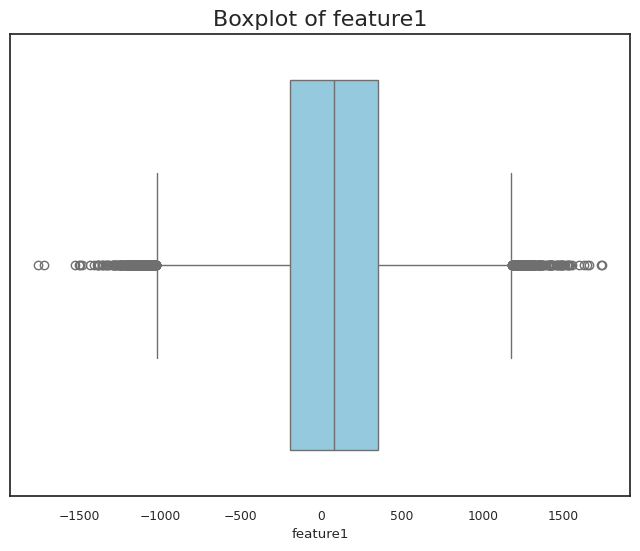

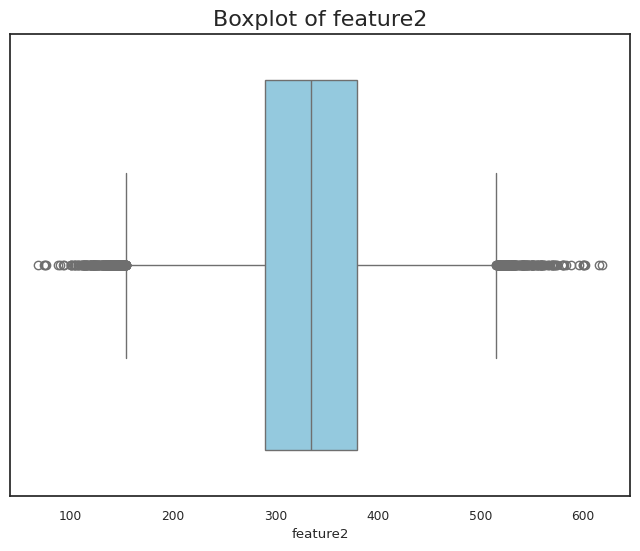

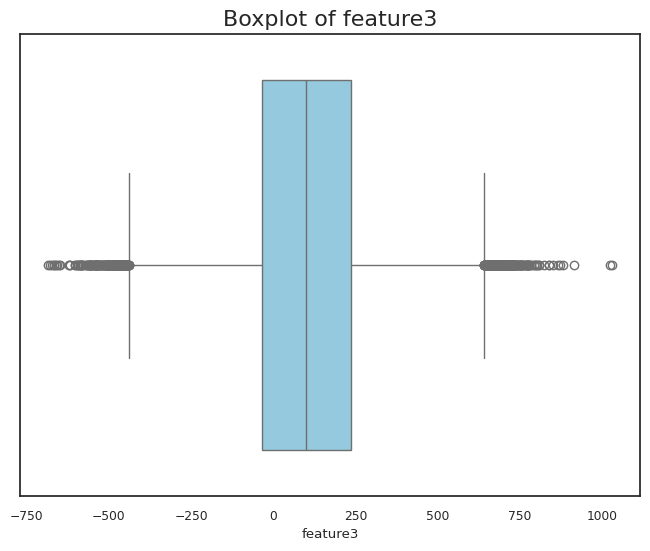

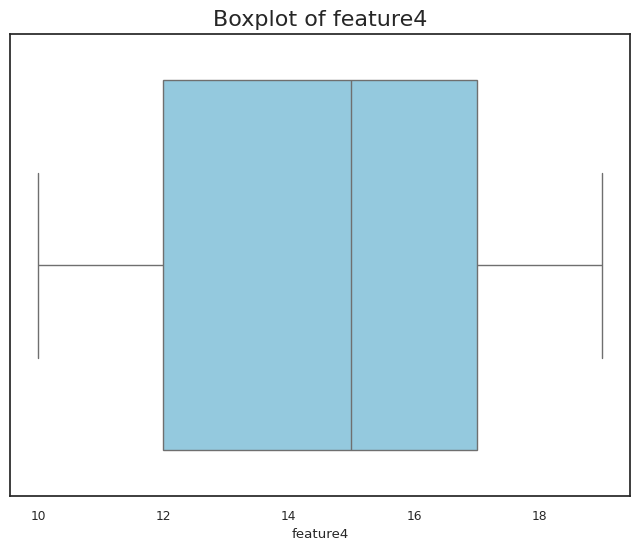

In [ ]:
features = ['feature1', 'feature2', 'feature3', 'feature4']
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[feature], color="skyblue")
    plt.title(f"Boxplot of {feature}", fontsize=16)
    plt.xlabel(feature)  # Set
    plt.show()  #

In [ ]:
# lets try z score to remove outlier

In [ ]:

# Calculate Z-scores for all numeric columns
z_scores = np.abs((df - df.mean()) / df.std())

# Define a threshold for Z-score
threshold = 3

# Remove rows where any Z-score exceeds the threshold
df_3 = df[(z_scores < threshold).all(axis=1)]



In [ ]:
# lets plot boxplot for after removing using zscore for 3 value as threshold

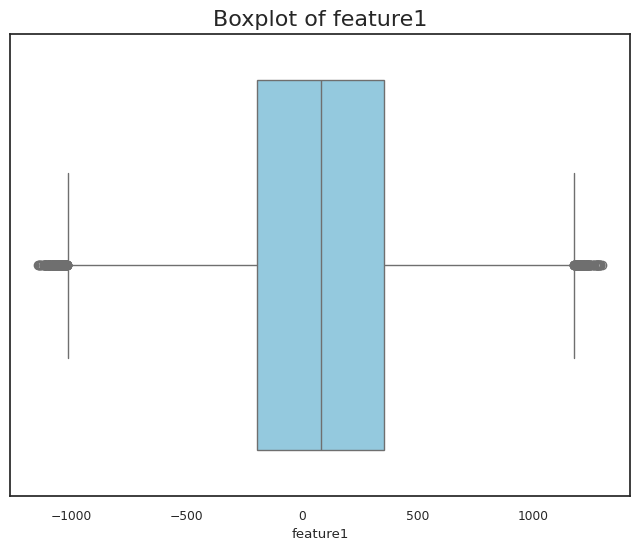

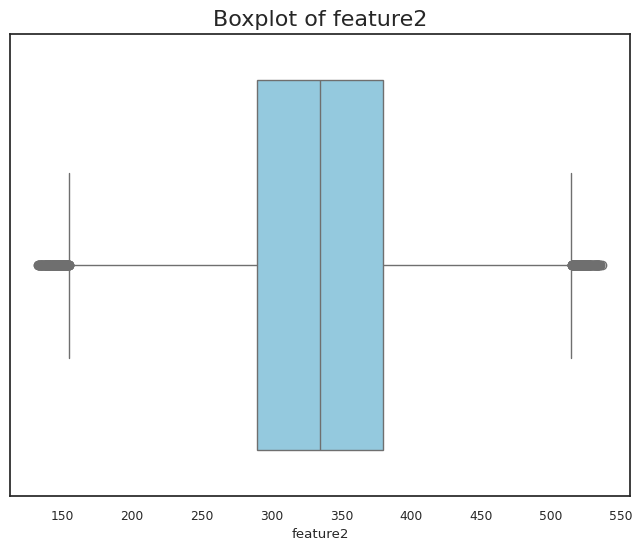

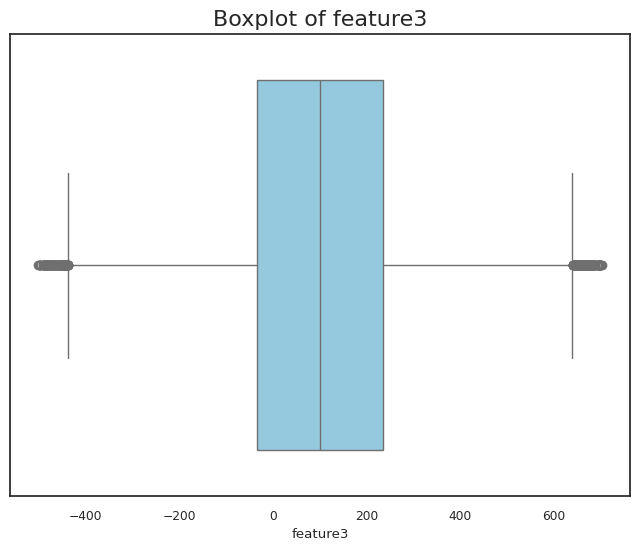

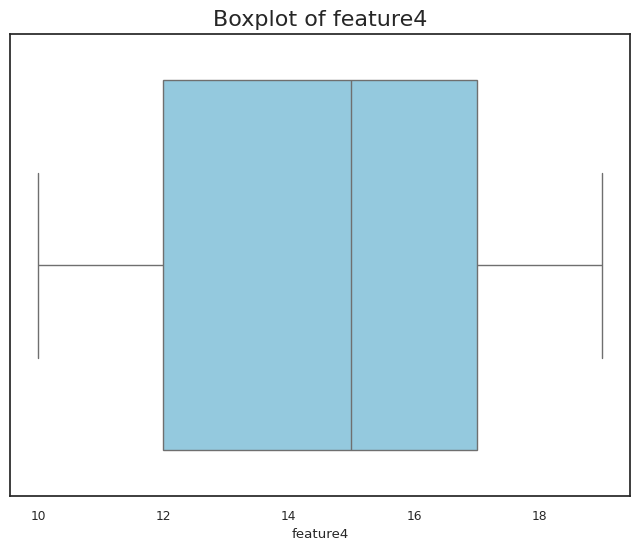

In [ ]:
features = ['feature1', 'feature2', 'feature3', 'feature4']
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_3[feature], color="skyblue")
    plt.title(f"Boxplot of {feature}", fontsize=16)
    plt.xlabel(feature)  # Set
    plt.show()  #

In [ ]:
# well there are still some ouler are present so lets try for threshol=2

In [ ]:

# Calculate Z-scores for all numeric columns
z_scores = np.abs((df - df.mean()) / df.std())

# Define a threshold for Z-score
threshold = 2

# Remove rows where any Z-score exceeds the threshold
df_2 = df[(z_scores < threshold).all(axis=1)]



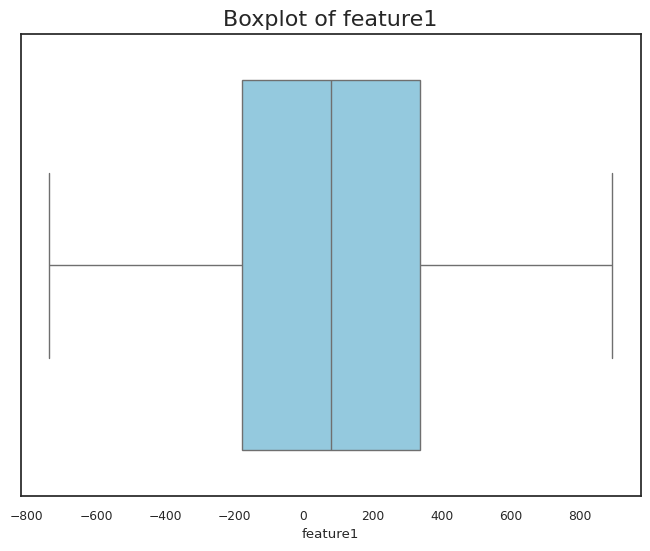

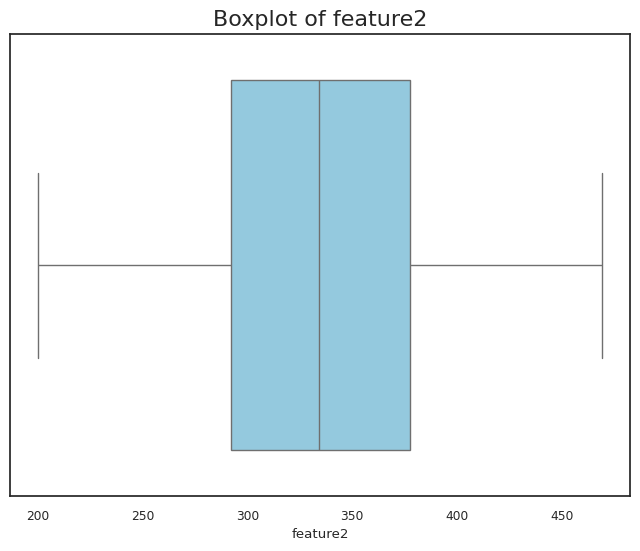

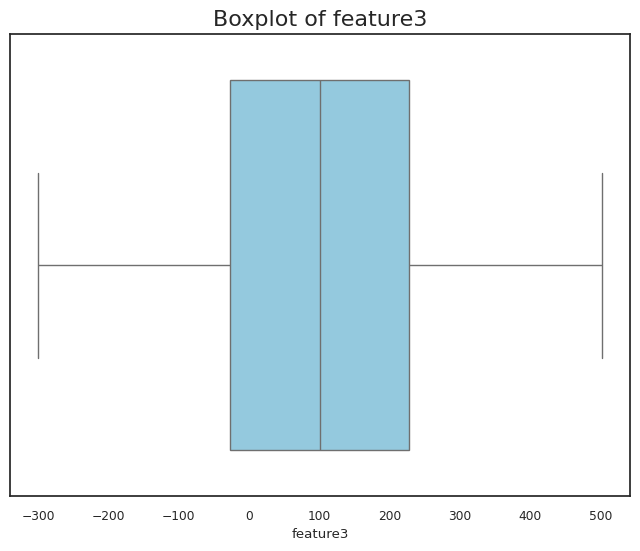

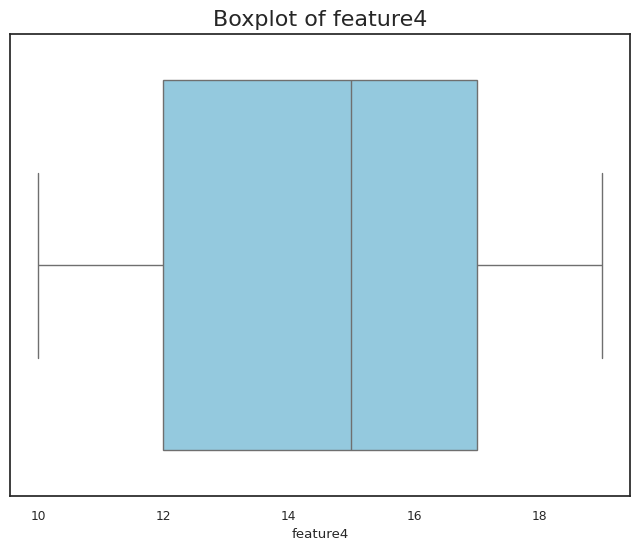

In [ ]:
features = ['feature1', 'feature2', 'feature3', 'feature4']
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_2[feature], color="skyblue")
    plt.title(f"Boxplot of {feature}", fontsize=16)
    plt.xlabel(feature)  # Set
    plt.show()  #

In [ ]:

# Calculate Z-scores for all numeric columns
z_scores = np.abs((df - df.mean()) / df.std())

# Define a threshold for Z-score
threshold = 2

# Remove rows where any Z-score exceeds the threshold
df = df[(z_scores < threshold).all(axis=1)]



Outliers were detected using box plots and addressed with a z-score method. Initially, a threshold of 3 was used, but some outliers remained. The threshold was adjusted to 2, which successfully removed all outliers.

In [ ]:
# lets check balce for each class

In [ ]:
df['target'].value_counts()

,count
target,
3.0,11204
1.0,11071
4.0,11036
5.0,11001
0.0,10757


The target variable exhibits a balanced distribution across its classes.

In [ ]:
# lets plot

### kde plot

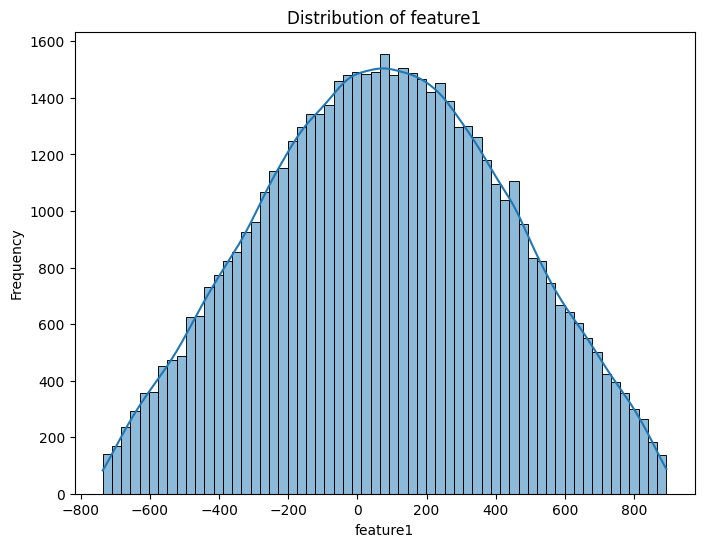

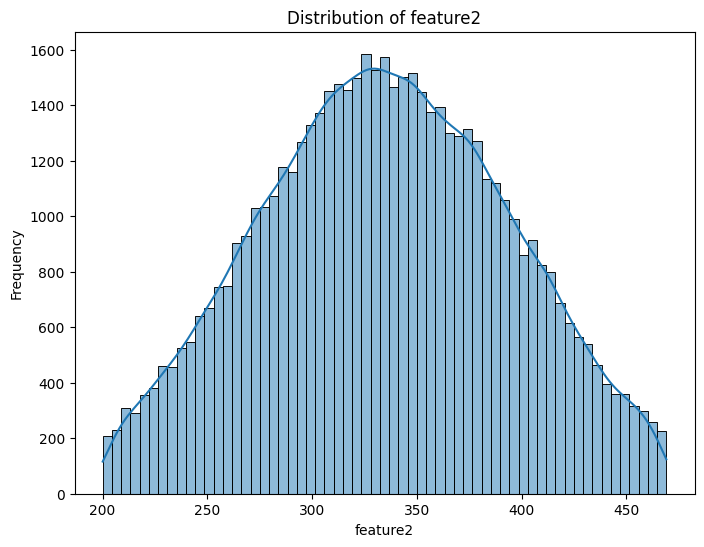

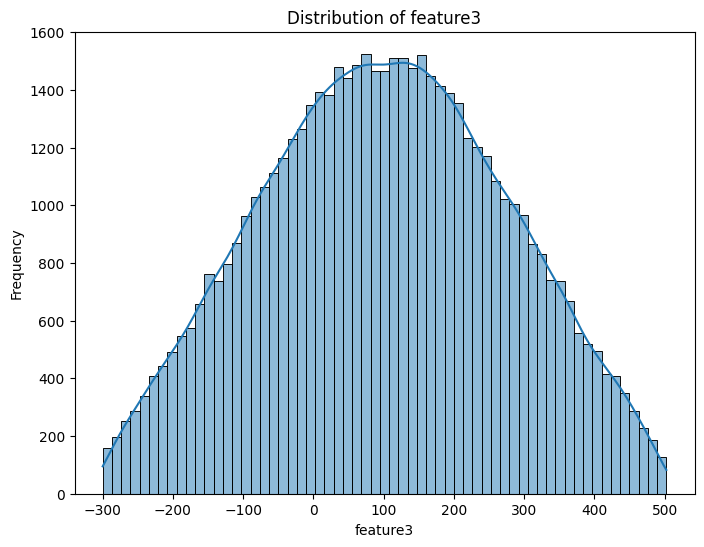

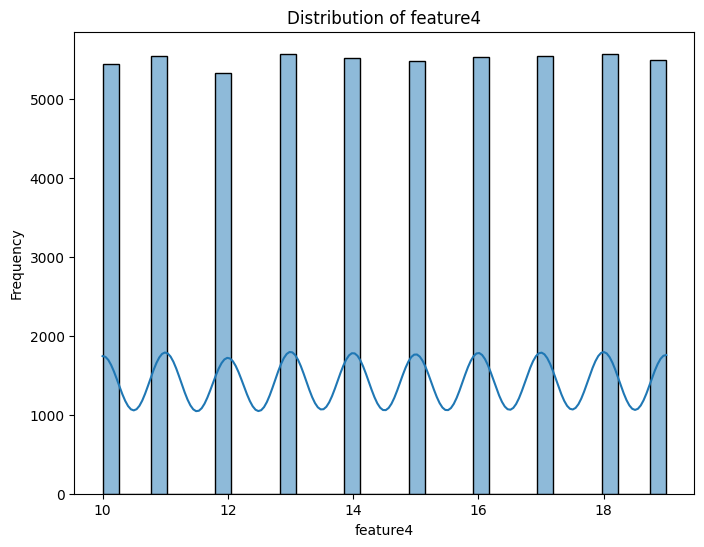

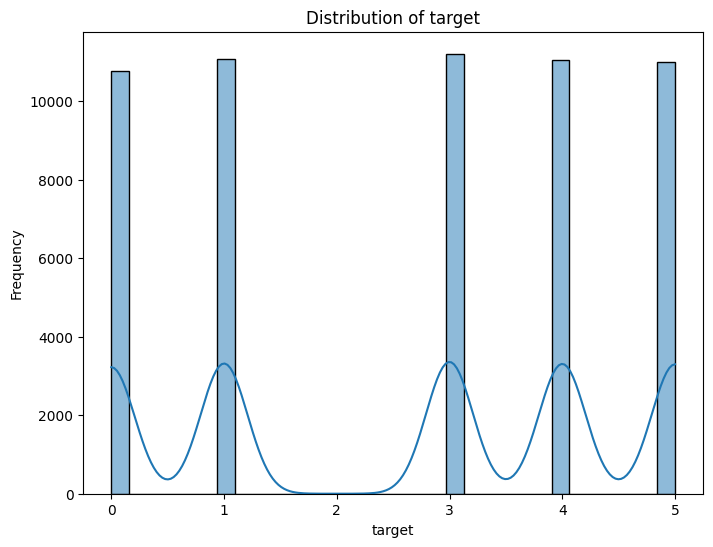

In [ ]:


# List of features to plot
features = ['feature1', 'feature2', 'feature3', 'feature4', 'target']

# Create histograms for each feature
for feature in features:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.histplot(df[feature], kde=True)  # kde=True adds a kernel density estimate
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

KDE plots were plotted for each variable, showing almost perfect normal distributions for 'feature1', 'feature2', and 'feature3'. However, 'feature4' and the target variable were found to deviate from normality. This suggests that potential transformations or different modeling approaches may be needed for these variables.

In [ ]:
# lets plot heatmap

### Heatmap for correlation

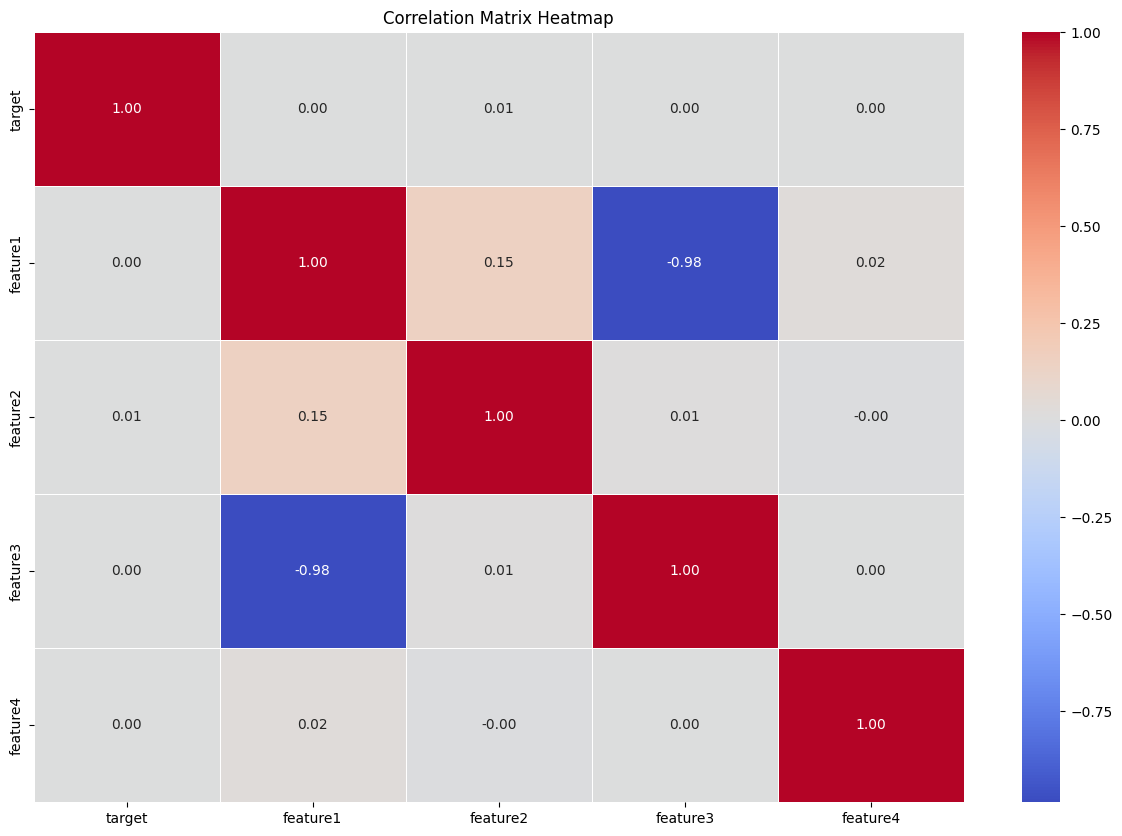

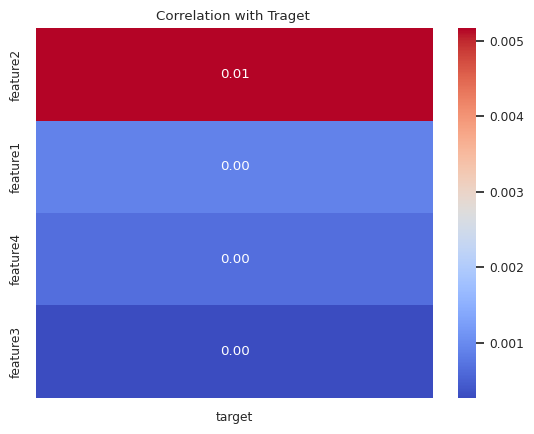

In [ ]:
correlation_matrix = df.corr()

#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

corr = df.corr()
target_corr = corr['target'].drop('target')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)


print('='*140)

#Graph II
# Create a heatmap of the correlations with the target column
sns.set(font_scale=0.8)


sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Traget ')
plt.show()



The heatmap indicates very low correlation with the target variable.

### scater plot

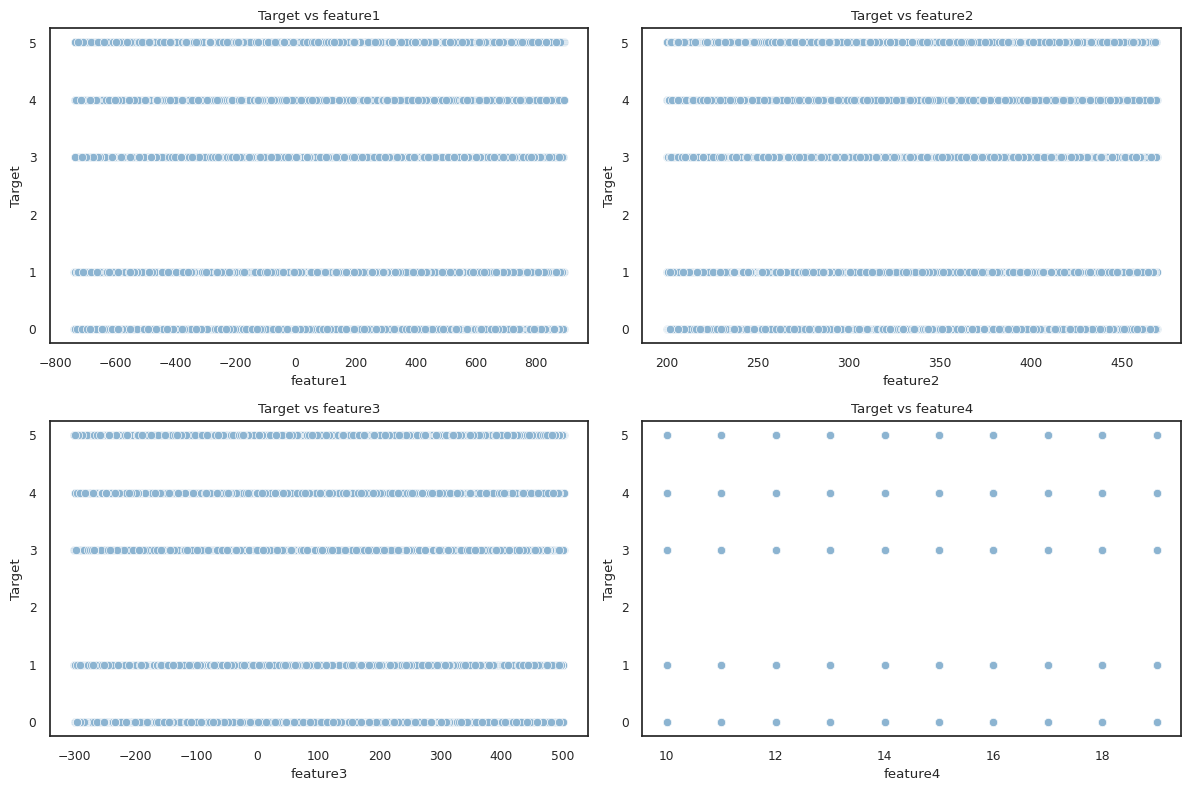

In [ ]:
# List of features
features = ['feature1', 'feature2', 'feature3', 'feature4']

# Create scatter plots
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)  # Create a grid of 2x2 subplots
    sns.scatterplot(data=df, x=feature, y='target')
    plt.title(f'Target vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Target')

plt.tight_layout()
plt.show()


In [ ]:
# well here scale is diffrent lets see after doing scaling

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


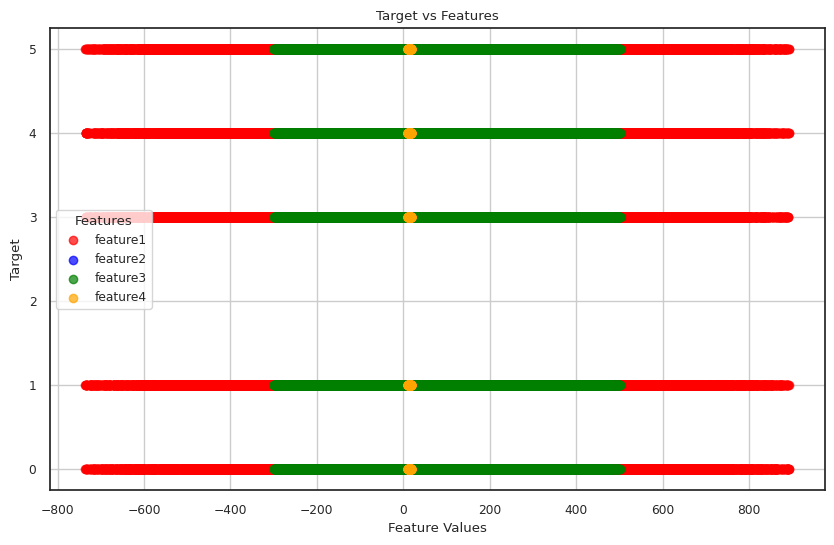

In [ ]:
# Plot target against all features in one chart
plt.figure(figsize=(10, 6))

# List of features
features = ['feature1', 'feature2', 'feature3', 'feature4']

# Assign different colors to each feature
colors = ['red', 'blue', 'green', 'orange']

# Plot each feature
for feature, color in zip(features, colors):
    plt.scatter(df[feature], df['target'], label=feature, alpha=0.7, color=color)

# Add labels, legend, and title
plt.xlabel('Feature Values')
plt.ylabel('Target')
plt.title('Target vs Features')
plt.legend(title='Features')
plt.grid(True)
plt.show()


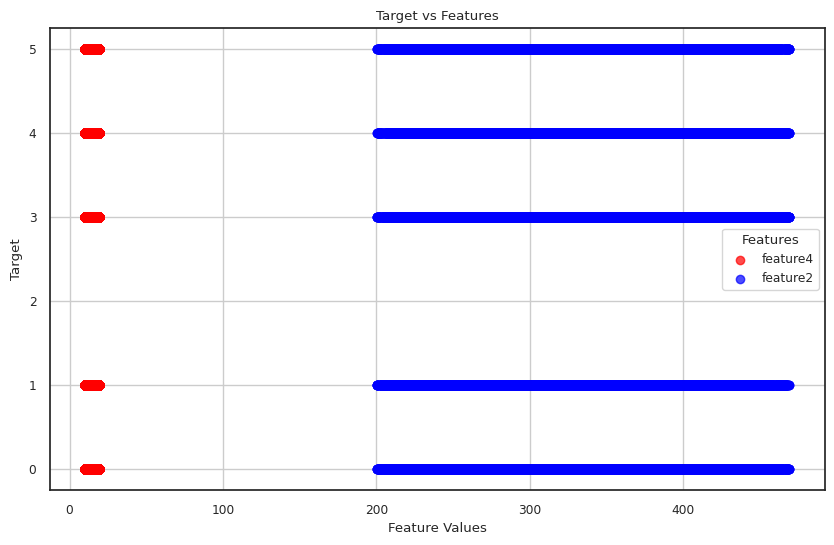

In [ ]:
# Plot target against all features in one chart
plt.figure(figsize=(10, 6))

# List of features
features = ['feature4', 'feature2']
#features = ['feature1', 'feature2', 'feature3']

# Assign different colors to each feature
colors = ['red', 'blue']
#colors = ['red', 'blue', 'green']

# Plot each feature
for feature, color in zip(features, colors):
    plt.scatter(df[feature], df['target'], label=feature, alpha=0.7, color=color)

# Add labels, legend, and title
plt.xlabel('Feature Values')
plt.ylabel('Target')
plt.title('Target vs Features')
plt.legend(title='Features')
plt.grid(True)
plt.show()


From the above plot, we can conclude that the target variable is not linearly separable due to its uniform distribution across discrete categories and the absence of distinct separable regions.

# Baseline model
### Baseline Model Building

In this section, we will build and evaluate several baseline models to understand their performance on our dataset. The models include both tree-based and non-tree-based approaches to account for different assumptions about data structure and relationships.

#### Models to be Implemented:
1. **Random Forest (RF)**: An ensemble tree-based model leveraging bagging to reduce variance and improve generalization.
2. **Bagging Classifier (Bagging)**: A general bagging method using decision trees as base estimators to assess the impact of variance reduction.
3. **Decision Tree (DT)**: A single decision tree to serve as a straightforward baseline for comparison.
4. **XGBoost (Boosting)**: A boosting-based ensemble method to capture complex patterns in data.
5. **Naive Bayes (NB)**: A probabilistic model assuming conditional independence (though this may not hold here due to potential multicollinearity and high VIF).
6. **Support Vector Machine (SVM)**: With an RBF kernel to assess non-linear separability of the target variable.

#### Evaluation Metrics:
The models will be evaluated using the following metrics:
- **Accuracy**: Overall correctness of predictions.
- **Precision, Recall, F1-score**: To balance the trade-off between false positives and false negatives.

Through this comparison, we aim to identify which models perform well and provide insights into the data's structure and separability.

In [ ]:
# Prepare data for model training by separating features, target, and splitting into training/testing sets.

X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Random forest

In [ ]:
# Initialize and train a RandomForestClassifier model with random_state=42 for reproducibility.

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


# Predicting with Random Forest
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='weighted')
rf_recall = recall_score(y_test, rf_predictions, average='weighted')
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Random Forest Precision: {rf_precision:.4f}")
print(f"Random Forest Recall: {rf_recall:.4f}")
print(f"Random Forest F1-score: {rf_f1:.4f}")


Random Forest Accuracy: 0.1988
Random Forest Precision: 0.1988
Random Forest Recall: 0.1988
Random Forest F1-score: 0.1988


### Decison tree

In [ ]:
# DT

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


# Predicting with Decision Tree
dt_predictions = dt_model.predict(X_test)

# Calculate metrics for Decision Tree
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions, average='weighted')
dt_recall = recall_score(y_test, dt_predictions, average='weighted')
dt_f1 = f1_score(y_test, dt_predictions, average='weighted')

# Print metrics for Decision Tree
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Decision Tree Precision: {dt_precision:.4f}")
print(f"Decision Tree Recall: {dt_recall:.4f}")
print(f"Decision Tree F1-score: {dt_f1:.4f}")

Decision Tree Accuracy: 0.2056
Decision Tree Precision: 0.2057
Decision Tree Recall: 0.2056
Decision Tree F1-score: 0.2056


### Naive bayes

In [ ]:
# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)
# Predicting with Naive Bayes
nb_predictions = nb_model.predict(X_test)


# Evaluate metrics
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions, average='weighted')
nb_recall = recall_score(y_test, nb_predictions, average='weighted')
nb_f1 = f1_score(y_test, nb_predictions, average='weighted')


print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")
print(f"Naive Bayes Precision: {nb_precision:.4f}")
print(f"Naive Bayes Recall: {nb_recall:.4f}")
print(f"Naive Bayes F1-score: {nb_f1:.4f}")


Naive Bayes Accuracy: 0.1999
Naive Bayes Precision: 0.1617
Naive Bayes Recall: 0.1999
Naive Bayes F1-score: 0.1609


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### xgboost

In [ ]:

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable 'y' to integers
y_encoded = label_encoder.fit_transform(y)

# Split the data again with the transformed target
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Predicting with XGBoost
xgb_predictions = xgb_model.predict(X_test)

# Convert predictions back to the original labels
xgb_predictions_original = label_encoder.inverse_transform(xgb_predictions)

# Evaluate accuracy
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")

# Evaluate precision, recall, and F1 score

xgb_precision = precision_score(y_test, xgb_predictions, average='weighted')
xgb_recall = recall_score(y_test, xgb_predictions, average='weighted')
xgb_f1 = f1_score(y_test, xgb_predictions, average='weighted')

print(f"XGBoost Precision: {xgb_precision:.4f}")
print(f"XGBoost Recall: {xgb_recall:.4f}")
print(f"XGBoost F1 Score: {xgb_f1:.4f}")


XGBoost Accuracy: 0.1945
XGBoost Precision: 0.1945
XGBoost Recall: 0.1945
XGBoost F1 Score: 0.1941



### SVM

In [ ]:
#Let's experiment with Min-Max Scaling and StandardScaler to evaluate their effect on SVM performance.


#### Standard Scaling

In [ ]:

df_scale=df.copy()


# Initialize StandardScaler
scaler = StandardScaler()

# Select the columns to scale (excluding the target)
columns_to_scale = ['feature1', 'feature2', 'feature3', 'feature4']

# Fit and transform the features
df_scale[columns_to_scale] = scaler.fit_transform(df_scale[columns_to_scale])



In [ ]:

# Prepare data for model training by separating features, target, and splitting into training/testing sets.
X = df_scale.drop(columns=['target'])
y = df_scale['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier object
svm_classifier = SVC(kernel='rbf')

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Evaluate precision, recall, and F1 score with a multiclass average
precision = precision_score(y_test, y_pred, average='macro')  # or 'micro', 'weighted', depending on your needs
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.1967
Precision: 0.1991
Recall: 0.1966
F1 Score: 0.1757


#### minmax scaling

In [ ]:
df_scale_min=df.copy()


# Initialize StandardScaler
scaler = MinMaxScaler()


# Select the columns to scale (excluding the target)
columns_to_scale = ['feature1', 'feature2', 'feature3', 'feature4']

# Fit and transform the features
df_scale_min[columns_to_scale] = scaler.fit_transform(df_scale_min[columns_to_scale])



In [ ]:


# Prepare data for model training by separating features, target, and splitting into training/testing sets.
X = df_scale_min.drop(columns=['target'])
y = df_scale_min['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier object
svm_classifier = SVC(kernel='rbf')

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Evaluate precision, recall, and F1 score with a multiclass average
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


For the SVM model, we experimented with both Min-Max Scaling and Standard Scaling, but unfortunately, neither approach led to any improvement or significant results.









In [ ]:
# with min max and stand scaling no imporvement

# Baseline Model Results

The table below summarizes the accuracy of the baseline models built for the dataset:

| **Technique**      | **Model**      | **Accuracy** |
|---------------------|----------------|--------------|
| Random Forest (RF)  | RF             | 0.198838     |
| Decision Tree (DT)  | DT             | 0.205647     |
| XGBoost (Boosting)  | XGBoost        | 0.194480     |
| Support Vector Machine (SVM) | SVM   | 0.197294     |
| Naive Bayes (NB)    | NB             | 0.1999       |

#### Observations:
- The accuracy of all models is close to random guessing, suggesting that the dataset might lack clear patterns or separability.
- The Decision Tree (DT) achieved the highest accuracy (0.2056), but the difference is marginal.
- Naive Bayes, despite the conditional independence assumption not holding well here, performed comparably to the other models.
- The SVM with the RBF kernel did not improve accuracy significantly, further indicating limited non-linear separability in the data.

These results emphasize the need for further feature engineering, hyperparameter tuning, or alternative modeling approaches.

# Feature enginering

### Feature Engineering Techniques

To improve model performance, we will apply various feature engineering techniques to transform the dataset and uncover hidden patterns that may aid in better separability of the target variable. The following transformations will be explored:

1. **Log Transformations**:  
   - Apply logarithmic transformations to reduce skewness and stabilize variance in continuous features.

2. **Polynomial Features**:  
   - Generate higher-degree polynomial features to capture non-linear relationships between variables.

3. **Mutual Interactions**:  
   - Create interaction features between pairs of variables to account for their combined effects on the target variable.

4. **Trigonometric Transformations**:  
   - Use sine, cosine, or tangent transformations to explore cyclical or periodic patterns within the data.

#### Next Steps:
- Apply these transformations individually and in combinations to create enriched feature sets.
- Re-train the models on these engineered features and evaluate their performance using the same metrics (Accuracy, Precision, Recall, F1-score).  
- Compare the results with the baseline models to assess the impact of feature engineering.

### Polynomial

In [ ]:
# Create PolynomialFeatures object
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

# Apply polynomial transformation
X_poly = poly.fit_transform(df[['feature1', 'feature2', 'feature3', 'feature4']])

# Get feature names and replace spaces with underscores
feature_names = poly.get_feature_names_out(['feature1', 'feature2', 'feature3', 'feature4'])
feature_names = [name.replace(' ', '_') for name in feature_names]

# Create DataFrame with polynomial features and updated column names
df_poly = pd.DataFrame(X_poly, columns=feature_names)
df_poly['target'] = df['target']  # Add target variable back


polynomial features are generated using PolynomialFeatures, and a DataFrame is created with the transformed features and the target variable

In [ ]:
df_poly

,feature1^2,feature1_feature2,feature1_feature3,feature1_feature4,feature2^2,feature2_feature3,feature2_feature4,feature3^2,feature3_feature4,feature4^2,target
0,9740.464591,27858.450983,6596.997347,1875.182049,79677.235504,18867.901578,5363.159705,4467.997762,1270.018579,361.0,3.0
1,445618.925648,153211.836471,-154893.295508,12015.845035,52676.997057,-53255.113049,4131.264582,53839.573709,-4176.604109,324.0,5.0
2,212.080439,3774.565714,1480.018603,276.696654,67178.974267,26341.078459,4924.592339,10328.416323,1930.947512,361.0,5.0
3,1474.155049,-10203.573976,-4624.797789,-422.341995,70625.489456,32011.196106,2923.300228,14509.162117,1324.993817,121.0,0.0
4,75386.330700,102357.910131,7040.461562,3843.919981,138979.330457,9559.384641,5219.190432,657.521046,358.990425,196.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
55063,6715.200796,-23345.378152,-13307.234530,-1393.087589,81160.146609,46262.566336,4843.065390,26370.394010,2760.623819,289.0,3.0
55065,88222.910009,-112420.532045,-91480.936995,-3267.257583,143255.034594,116572.164848,4163.395151,94859.281252,3387.915736,121.0,5.0
55066,16328.203464,-36179.931463,-21776.381106,-2044.509742,80167.266631,48251.969524,4530.211944,29042.434160,2726.694546,256.0,3.0
55067,603479.534339,201977.677946,-218628.868662,12429.431234,67599.612029,-73172.574564,4159.988062,79204.976296,-4502.940587,256.0,4.0


In [ ]:
df_poly=df_poly.dropna()

### log

In [ ]:
df_log = df.copy()  # Create a copy of the original DataFrame 'df'

for feature in ['feature1', 'feature2', 'feature3', 'feature4']:
    df_log[f'{feature}_log'] = np.log1p(df_log[feature])
df_log['target'] = df['target']  # Add target variable back


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


The log transformation (`log1p`) is applied to selected features, and a new DataFrame is created with the transformed features and the target variable.

In [ ]:
df_log.head()

,target,feature1,feature2,feature3,feature4,feature1_log,feature2_log,feature3_log,feature4_log
0,3.0,98.693792,282.271563,66.843083,19.0,4.602103,5.646406,4.217197,2.995732
2,5.0,14.562982,259.189071,101.628816,19.0,2.744895,5.561409,4.631119,2.995732
4,1.0,274.565713,372.799317,25.642173,14.0,5.618826,5.923719,3.282495,2.708050
5,1.0,22.764299,301.605393,113.089639,19.0,3.168184,5.712430,4.736984,2.995732
14,1.0,236.993625,299.524821,10.661483,10.0,5.472244,5.705530,2.456291,2.397895


In [ ]:
df_log.isnull().sum()

,0
target,0
feature1,0
feature2,0
feature3,0
feature4,0
feature1_log,23019
feature2_log,0
feature3_log,16305
feature4_log,0


In [ ]:
df_log=df_log.dropna()

In [ ]:
# lets try rf & xgboost

In [ ]:
df_log.head()

,target,feature1,feature2,feature3,feature4,feature1_log,feature2_log,feature3_log,feature4_log
0,3.0,98.693792,282.271563,66.843083,19.0,4.602103,5.646406,4.217197,2.995732
2,5.0,14.562982,259.189071,101.628816,19.0,2.744895,5.561409,4.631119,2.995732
4,1.0,274.565713,372.799317,25.642173,14.0,5.618826,5.923719,3.282495,2.708050
5,1.0,22.764299,301.605393,113.089639,19.0,3.168184,5.712430,4.736984,2.995732
14,1.0,236.993625,299.524821,10.661483,10.0,5.472244,5.705530,2.456291,2.397895


### Trigonometric Function

In [ ]:
df_trigo = df.copy()

# Sine transformations
df_trigo['sin_feature1'] = np.sin(df_trigo['feature1'])
df_trigo['sin_feature2'] = np.sin(df_trigo['feature2'])
df_trigo['sin_feature3'] = np.sin(df_trigo['feature3'])
df_trigo['sin_feature4'] = np.sin(df_trigo['feature4'])

# Cosine transformations
df_trigo['cos_feature1'] = np.cos(df_trigo['feature1'])
df_trigo['cos_feature2'] = np.cos(df_trigo['feature2'])
df_trigo['cos_feature3'] = np.cos(df_trigo['feature3'])
df_trigo['cos_feature4'] = np.cos(df_trigo['feature4'])

# Tangent transformations
df_trigo['tan_feature1'] = np.tan(df_trigo['feature1'])
df_trigo['tan_feature2'] = np.tan(df_trigo['feature2'])
df_trigo['tan_feature3'] = np.tan(df_trigo['feature3'])
df_trigo['tan_feature4'] = np.tan(df_trigo['feature4'])

# Include the target variable
df_trigo['target'] = df['target']

Trigonometric transformations (sine, cosine, and tangent) are applied to selected features, and a new DataFrame is created with the transformed features and the target variable.

In [ ]:
df_trigo.isnull().sum()

,0
target,0
feature1,0
feature2,0
feature3,0
feature4,0
sin_feature1,0
sin_feature2,0
sin_feature3,0
sin_feature4,0
cos_feature1,0


### Mutual Interaction Feat


In [ ]:
X = df.drop(columns=['target'])  # Features
y = df['target']  # Target variable

# Calculate mutual information scores
mi_scores = mutual_info_classif(X, y)

# Create a DataFrame to store feature names and their MI scores
mi_df = pd.DataFrame({'feature': X.columns, 'mi_score': mi_scores})

# Sort features by MI scores in descending order
mi_df = mi_df.sort_values(by=['mi_score'], ascending=False)

# Select top k features (e.g., k=2)
top_features = mi_df['feature'][:2].tolist()

# Create a copy of the original DataFrame to store interaction features
interaction_df = df.copy()

# Create interaction features in the new DataFrame
for i in range(len(top_features)):
    for j in range(i + 1, len(top_features)):
        interaction_df[f'{top_features[i]}_x_{top_features[j]}'] = interaction_df[top_features[i]] * interaction_df[top_features[j]]

# ...

Mutual information (MI) scores are calculated between features and the target variable to assess feature relevance. The top k features with the highest MI scores are selected, and interaction features are created between these top features. A new DataFrame is created to store the interaction features for further analysis.

### Squared

In [ ]:
df_squared = df.copy()

# Select the features to square (e.g., 'feature1', 'feature2', etc.)
features_to_square = ['feature1', 'feature2', 'feature3', 'feature4']

# Create squared features
for feature in features_to_square:
    df_squared[f'{feature}_squared'] = df_squared[feature] ** 2


Squared features are created for selected features by squaring their values, and a new DataFrame is generated to store both the original and squared features for further analysis or model training.

In [ ]:
# check null values for each feature technique

In [ ]:
feature_engineering_dfs = {
    'original': 'df',
    'standard_scaling': 'df_scale',
    'minmax_scaling': 'df_scale_min',
    'polynomial_features': 'df_poly',
    'log_transform': 'df_log',
    'trigonometric_transform': 'df_trigo',
    'mutual_information_interaction': 'interaction_df',
    'squared_features': 'df_squared'
}

for technique, df_name in feature_engineering_dfs.items():
    # Get the DataFrame
    df_current = globals()[df_name]  # Access DataFrame using its name

    # Check for null values
    null_counts = df_current.isnull().sum()

    # Print the results
    print(f"Null value counts for {technique}:")
    print(null_counts)
    print("-" * 20)

Null value counts for original:
target      0
feature1    0
feature2    0
feature3    0
feature4    0
dtype: int64
--------------------
Null value counts for standard_scaling:
target      0
feature1    0
feature2    0
feature3    0
feature4    0
dtype: int64
--------------------
Null value counts for minmax_scaling:
target      0
feature1    0
feature2    0
feature3    0
feature4    0
dtype: int64
--------------------
Null value counts for polynomial_features:
feature1^2           0
feature1_feature2    0
feature1_feature3    0
feature1_feature4    0
feature2^2           0
feature2_feature3    0
feature2_feature4    0
feature3^2           0
feature3_feature4    0
feature4^2           0
target               0
dtype: int64
--------------------
Null value counts for log_transform:
target          0
feature1        0
feature2        0
feature3        0
feature4        0
feature1_log    0
feature2_log    0
feature3_log    0
feature4_log    0
dtype: int64
--------------------
Null value coun

# Final Model and conclusion

The features created using Feature engineering techniques so far include:


- **Original**: `df`
- **Standard Scaling**: `df_scale`
- **Min-Max Scaling**: `df_scale_min`
- **Polynomial Features**: `df_poly`
- **Log Transformation**: `df_log`
- **Trigonometric Transformation**: `df_trigo`
- **Mutual Information Interaction**: `interaction_df`
- **Squared Features**: `df_squared`

### VIF Check
Let's calculate the Variance Inflation Factor (VIF) for all the features created so far using the feature engineering techniques.

In [ ]:
def calculate_vif(df, features):
    X = add_constant(df[features])
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

feature_engineering_dfs = {
    'original': df,
    'standard_scaling': df_scale,
    'minmax_scaling': df_scale_min,
    'polynomial_features': df_poly,
    'log_transform': df_log,
    'trigonometric_transform': df_trigo,
    'mutual_information_interaction': interaction_df,
    'squared_features': df_squared
}

for technique, df_current in feature_engineering_dfs.items():
    features = df_current.drop(columns=['target']).columns
    vif_results = calculate_vif(df_current, features)
    print(f"VIF for {technique}:")
    print(vif_results)
    print("-" * 20)

VIF for original:
    feature         VIF
0     const   84.141766
1  feature1  311.274523
2  feature2    9.644980
3  feature3  303.956432
4  feature4    1.206753
--------------------
VIF for standard_scaling:
    feature         VIF
0     const    1.000000
1  feature1  311.274523
2  feature2    9.644980
3  feature3  303.956432
4  feature4    1.206753
--------------------
VIF for minmax_scaling:
    feature          VIF
0     const  5403.409964
1  feature1   311.274523
2  feature2     9.644980
3  feature3   303.956432
4  feature4     1.206753
--------------------
VIF for polynomial_features:
              feature            VIF
0               const      24.400254
1          feature1^2   38399.716574
2   feature1_feature2   69466.759081
3   feature1_feature3  139590.266427
4   feature1_feature4    3901.512170
5          feature2^2    1599.782021
6   feature2_feature3   67999.271605
7   feature2_feature4     220.118344
8          feature3^2   63579.223306
9   feature3_feature4    3856.93

### VIF Interpretation

- **Original Features**: `feature1` and `feature3` show high VIF values (311.27 and 303.96), indicating multicollinearity. `feature4` has a low VIF (1.21), suggesting low correlation with other features.
- **Standard Scaling**: Scaling doesn't affect multicollinearity, as the VIFs remain unchanged.
- **Min-Max Scaling**: Similar to StandardScaler, scaling doesn't improve multicollinearity. The `const` term has an unusually high VIF (5403.41).
- **Polynomial Features**: Significant multicollinearity is observed, especially with squared and interaction terms (e.g., `feature1^2` with VIF of 38399.72).
- **Log Transformation**: Reduces VIF values compared to polynomial features, but still shows high VIF for `feature1` and `feature3`.
- **Trigonometric Transformation**: Most features (e.g., `sin_feature1`, `cos_feature1`) show low VIF values close to 1, suggesting reduced multicollinearity.
- **Mutual Information Interaction**: Shows moderate multicollinearity with VIF around 26.71, but not as severe as polynomial features.
- **Squared Features**: Moderate VIFs (e.g., 12.91 for `feature1_squared`), less severe than polynomial features but still indicate some multicollinearity.

### Conclusion:
Polynomial features introduce high multicollinearity. Log and trigonometric transformations help reduce it. Scaling doesn't significantly impact multicollinearity in this case.

In [ ]:
# sctter plot

### Scatter Plot & Heatmap for Trigonometric Features

Since the VIF values for the trigonometric features are very low, let's visualize the relationships between these features. We can create scatter plots to observe the pairwise relationships between them and a heatmap to assess their correlation.

The scatter plot matrix will help identify any visible patterns or clusters between the features, while the heatmap will show the correlation between the trigonometric features. These visualizations can give a better understanding of the feature interactions and their linearity, which might be contributing to the low VIF values.

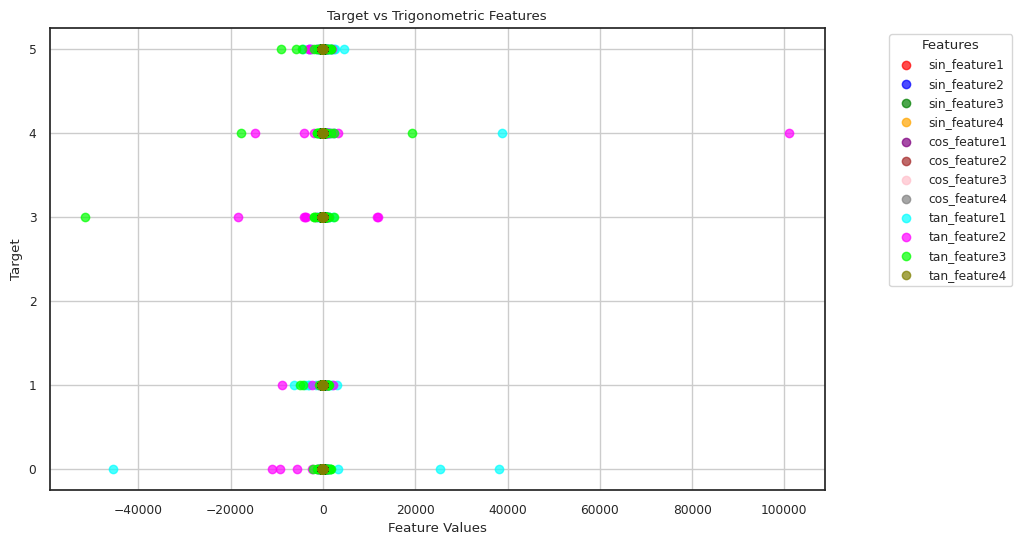

In [ ]:
plt.figure(figsize=(10, 6))

# List of features (updated for df_trigo)
features = ['sin_feature1', 'sin_feature2', 'sin_feature3', 'sin_feature4',
            'cos_feature1', 'cos_feature2', 'cos_feature3', 'cos_feature4',
            'tan_feature1', 'tan_feature2', 'tan_feature3', 'tan_feature4']

# Assign different colors to each feature (extended for 12 features)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta', 'lime', 'olive']

# Plot each feature
for feature, color in zip(features, colors):
    plt.scatter(df_trigo[feature], df_trigo['target'], label=feature, alpha=0.7, color=color)

# Add labels, legend, and title
plt.xlabel('Feature Values')
plt.ylabel('Target')
plt.title('Target vs Trigonometric Features')
plt.legend(title='Features', loc='upper right', bbox_to_anchor=(1.25, 1)) # Adjust legend position
plt.grid(True)
plt.show()

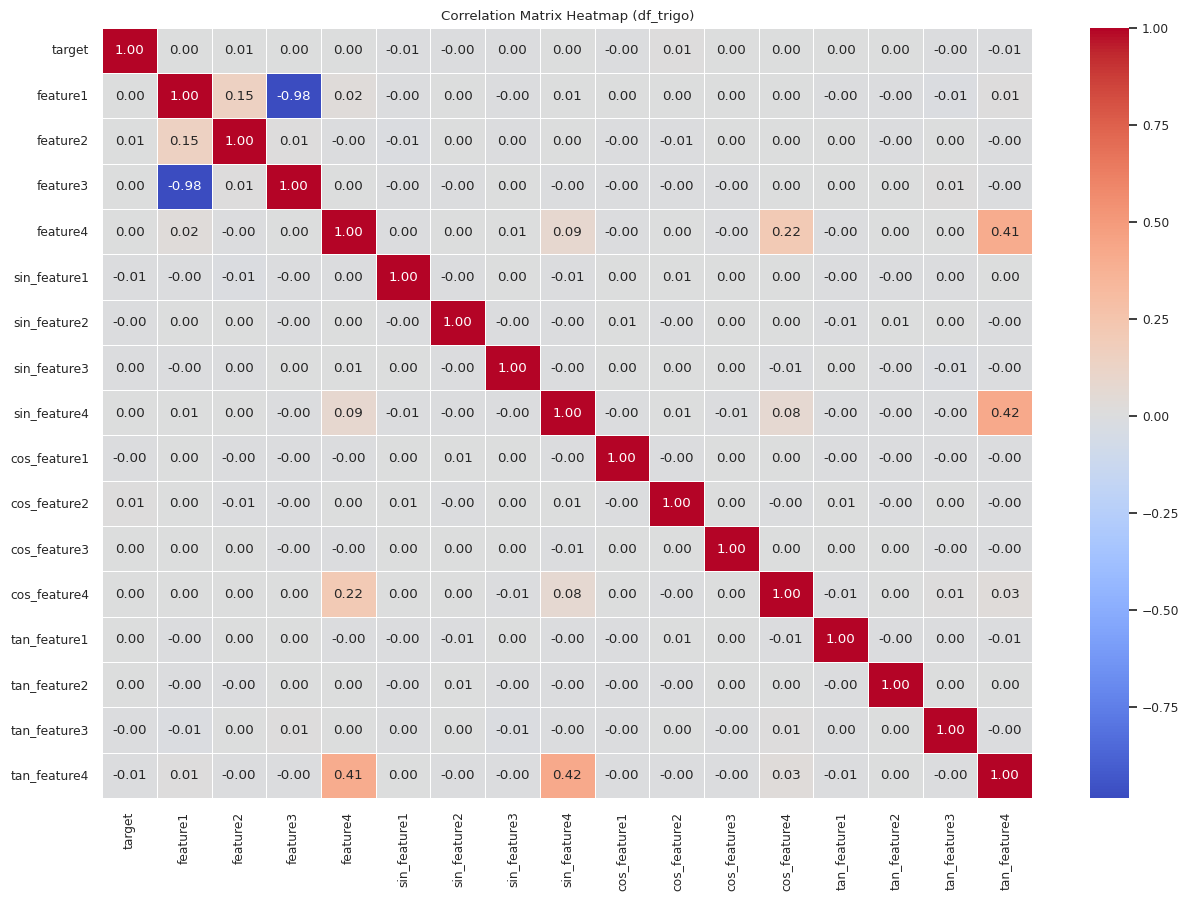

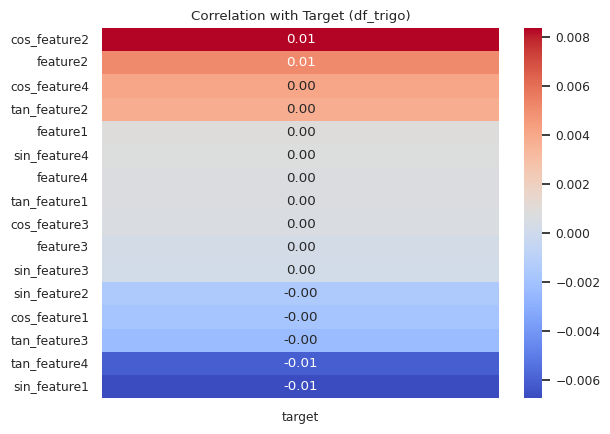

In [ ]:
# Calculate the correlation matrix for df_trigo
correlation_matrix = df_trigo.corr()

# Graph I: Full Correlation Matrix Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap (df_trigo)")
plt.show()

# Graph II: Correlation with Target
corr = df_trigo.corr()
target_corr = corr['target'].drop('target')  # Exclude target from its own correlation

# Sort correlations with target
target_corr_sorted = target_corr.sort_values(ascending=False)

print('=' * 140)

# Create heatmap for correlations with target
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Target (df_trigo)')
plt.show()

### Interpretation of Scatter Plot & Heatmap

From the scatter plot matrix and heatmap, we observe that the data is not linearly separable. This suggests that the relationships between the features are complex and not easily captured by linear models. Additionally, there is no significant correlation between the target variable and the trigonometric features, which implies that these features may not be strongly predictive of the target on their own.

This lack of correlation and non-linearity might require exploring more advanced models or feature engineering techniques to capture the underlying patterns effectively.



```
```



### Running Tree-Based Models with All Feature Engineering Techniques

We will now run tree-based models (Random Forest, Decision Tree, and XGBoost) using all the feature engineering techniques applied so far. The following datasets will be used:

- **Original**: `df`
- **Polynomial Features**: `df_poly`
- **Log Transformation**: `df_log`
- **Trigonometric Transformation**: `df_trigo`
- **Mutual Information Interaction**: `interaction_df`
- **Squared Features**: `df_squared`

The models to be used are:

- **Random Forest** (`RF`)
- **Decision Tree** (`DT`)
- **XGBoost** (`XGBoost`)

This approach will help assess the performance of different feature sets with various tree-based algorithms. Each model will be trained on the respective dataset and evaluated to determine which feature engineering technique yields the best results.

In [ ]:
# Updated feature engineering dictionary (excluding standard/minmax scaling)
feature_engineering_dfs = {
    'original': 'df',
    'polynomial_features': 'df_poly',
    'log_transform': 'df_log',
    'trigonometric_transform': 'df_trigo',
    'mutual_information_interaction': 'interaction_df',
    'squared_features': 'df_squared'
}

results = []

for technique, df_name in feature_engineering_dfs.items():
    # Get the DataFrame
    df_current = globals()[df_name]  # Access DataFrame using its name

    # Prepare data
    X = df_current.drop(columns=['target'])
    y = df_current['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train and evaluate models (excluding SVM)
    models = {
        'RF': RandomForestClassifier(random_state=42),
        'DT': DecisionTreeClassifier(random_state=42),
        'XGBoost': XGBClassifier(random_state=42)
    }

    for model_name, model in models.items():
        # For XGBoost, encode target if needed
        if model_name == 'XGBoost':
            label_encoder = LabelEncoder()
            y_train = label_encoder.fit_transform(y_train)
            y_test = label_encoder.transform(y_test)

        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions, average='weighted')
        recall = recall_score(y_test, predictions, average='weighted')
        f1 = f1_score(y_test, predictions, average='weighted')

        results.append([technique, model_name, accuracy, precision, recall, f1])

# Create results DataFrame
results_df = pd.DataFrame(results, columns=['Technique', 'Model', 'Accuracy', 'Precision', 'Recall', 'F1-score'])

In [ ]:
results_df

,Technique,Model,Accuracy,Precision,Recall,F1-score
0,original,RF,0.198838,0.198849,0.198838,0.198815
1,original,DT,0.205647,0.205707,0.205647,0.205630
2,original,XGBoost,0.194480,0.194533,0.194480,0.194128
3,polynomial_features,RF,0.198068,0.198483,0.198068,0.198184
4,polynomial_features,DT,0.198370,0.198587,0.198370,0.198455
5,polynomial_features,XGBoost,0.202295,0.202611,0.202295,0.202376
6,log_transform,RF,0.207050,0.206704,0.207050,0.206814
7,log_transform,DT,0.205144,0.204811,0.205144,0.204925
8,log_transform,XGBoost,0.208320,0.208307,0.208320,0.208254
9,trigonometric_transform,RF,0.199110,0.199063,0.199110,0.199027




```
```



### Findings Based on Model Evaluation

The evaluation of different tree-based models (Random Forest, Decision Tree, and XGBoost) using various feature engineering techniques provides some valuable insights into the dataset and the models' performance. Here's a detailed explanation of the findings:

1. **Performance Across Feature Engineering Techniques**:
   - **Log Transformation** consistently shows the best performance across all tree-based models. Specifically, **XGBoost** outperforms the other models with an accuracy of 0.2083, which is the highest among all tested feature engineering techniques.
   - Other techniques like **Polynomial Features**, **Trigonometric Transformation**, **Mutual Information Interaction**, and **Squared Features** yield similar, lower performance. The accuracy values for these techniques typically range from 0.198 to 0.202, showing limited improvement over the original features.
   - **Trigonometric Transformation** and **Mutual Information Interaction** seem to be relatively weaker in performance, suggesting that these transformations might not contribute significantly to improving the model’s predictive power for this dataset.

2. **XGBoost’s Dominance**:
   - **XGBoost** generally performs better than **Random Forest** and **Decision Tree**, but the differences are marginal. This indicates that **XGBoost** is likely better suited to capture complex patterns in the data, potentially because of its boosting mechanism, which helps reduce bias and variance.

3. **Lack of Correlation with the Target Variable**:
   - The data shows **no significant correlation** with the target variable, which means that the features are not strongly indicative of the outcome. This is critical as most models, including tree-based models, rely on feature-target relationships to make predictions.
   - The lack of correlation suggests that feature engineering alone may not be enough to achieve high performance, and more advanced techniques like feature selection or the inclusion of external data may be necessary.

4. **High Multicollinearity (VIF)**:
   - **High VIF values** observed across many features indicate strong multicollinearity, which can negatively impact model performance, especially for linear models. Although tree-based models like **Random Forest** and **XGBoost** are less sensitive to multicollinearity, it still suggests that some features might be redundant, leading to inefficient learning.
   - Despite this, the tree-based models still manage to perform reasonably well, indicating that they can handle the multicollinearity better than linear models would.

5. **Non-Linear Separability of the Data**:
   - The data is **not linearly separable**, meaning that a simple linear decision boundary cannot effectively separate the classes. This is consistent with the poor performance of **Logistic Regression** and **Naive Bayes** on non-linearly separable data.
   - Tree-based models, especially **Random Forest** and **XGBoost**, are better suited for such datasets because they do not rely on linear boundaries. They can capture complex, non-linear relationships and interactions between features, which is why they perform relatively better.

6. **Performance Compared to Random Guessing**:
   - Given that the dataset has 5 classes, with each class having an equal probability of 20%, the model's accuracy is close to random guessing.
   - For instance, the best-performing model (XGBoost with Log Transformation) achieves an accuracy of **20.83%**, which is only slightly above the 20% accuracy we would expect from random guessing in a 5-class classification problem.
   - This suggests that the models are not providing much better predictive performance than random chance, indicating that the features might not be informative enough to predict the target variable reliably.

### Conclusion:
- The feature engineering technique of **Log Transformation** along with **XGBoost** provides the best results, but the overall performance remains low due to the lack of correlation with the target and the high VIF of features.
- The dataset's **non-linearly separable** nature and **high multicollinearity** suggest that advanced feature engineering techniques, feature selection, or even the inclusion of additional data might be necessary to achieve better performance.
- **Tree-based models**, such as **Random Forest**, **Decision Tree**, and **XGBoost**, are appropriate for this dataset as they can handle complex relationships and non-linear separability, unlike linear models like **Logistic Regression** and **Naive Bayes**, which struggle in such scenarios.
- Given the poor accuracy close to random guessing (20%), it is evident that the current feature set and transformations are not sufficiently predictive, and further exploration is required.